In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

c:\Users\Armaan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.mnist.load_data()

In [3]:
mnist_train=train_images
mnist_test=test_images
mnist_train.shape,mnist_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
mnist_train.resize(60000,784)
mnist_test.resize(10000,784)

In [5]:
mnist_train.shape,mnist_test.shape

((60000, 784), (10000, 784))

In [6]:
train_labels.shape ,test_labels.shape

((60000,), (10000,))

In [7]:
mnist_train=np.array(mnist_train)
mnist_test=np.array(mnist_test)

In [8]:
mnist_train.shape,mnist_test.shape

((60000, 784), (10000, 784))

In [9]:
mnist_train_labels=np.array(train_labels)
mnist_test_labels=np.array(test_labels)

In [10]:
mnist_train_labels.shape ,mnist_test_labels.shape

((60000,), (10000,))

In [11]:
mnist_train_labels_ohe=np.zeros((mnist_train_labels.size,mnist_train_labels.max()+1))
mnist_train_labels_ohe[np.arange(mnist_train_labels.size),mnist_train_labels]=1

In [12]:
mnist_test_labels_ohe=np.zeros((mnist_test_labels.size,mnist_test_labels.max()+1))
mnist_test_labels_ohe[np.arange(mnist_test_labels.size),mnist_test_labels]=1

In [13]:
mnist_test_labels_ohe.shape

(10000, 10)

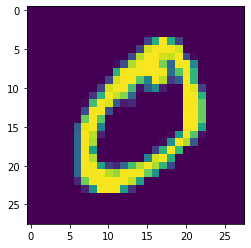

In [14]:
first_image=mnist_train[1]
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape(28,28)
plt.imshow(first_image)
plt.show()

In [15]:
n_inputs=784
n_hidden_1=256
n_hidden_2=256
n_classes=10

In [16]:
weights={
    "h1":tf.Variable(tf.random.normal([n_inputs,n_hidden_1])),
    "h2":tf.Variable(tf.random.normal([n_hidden_1,n_hidden_2])),
    "out":tf.Variable(tf.random.normal([n_hidden_2,n_classes]))
}
biases={
    "h1":tf.Variable(tf.random.normal([n_hidden_1])),
    "h2":tf.Variable(tf.random.normal([n_hidden_2])),
    "out":tf.Variable(tf.random.normal([n_classes]))
}

In [17]:
def forward_propagation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights["h1"]),biases["h1"])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights["h2"]),biases["h2"])
    out_layer2=tf.nn.relu(in_layer2)

    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [18]:

x=tf.compat.v1.placeholder("float",[None,n_inputs])
y=tf.compat.v1.placeholder(tf.int32,[None,n_classes])
pred=forward_propagation(x,weights,biases)

In [19]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [20]:
#predictions=tf.argmax(pred,1)
#true_labels=tf.argmax(y,1)
#correct_predictions=tf.equal(predictions,true_labels)

In [21]:

#predictions_eval,lables,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist_train,y:mnist_train_labels_oke})
#predictions_eval,lables,correct_pred

In [22]:
#correct_pred.sum()

In [23]:
optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [24]:
sess=tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [25]:
batch_size=500
for i in range(25):
    n=int(mnist_train.shape[0]/batch_size)
    i=0
    for j in range(n):
        x_=mnist_train[i:i+batch_size][:]
        y_=mnist_train_labels_ohe[i:i+batch_size][:]
        i+=batch_size
        c,_=sess.run([cost,optimize],feed_dict={x:x_,y:y_})
print(c)

151.91609


In [26]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)
predictions_eval,correct_pred=sess.run([predictions,correct_predictions],feed_dict={x:mnist_test,y:mnist_test_labels_ohe})
correct_pred.sum()

9595